California Housing Data Linear Regression

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing

# Load the California housing dataset
data = fetch_california_housing()

# Convert the dataset to a pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

# Display the first five rows of the DataFrame
df.head(5)

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  RoomsPerPerson  PopulationDensity  
0    -122.23        0.021690              126.0  
1    -122.22        0.002598             1138.0  
2    -122.24        0.016710              177.0  
3    -122.25        0.010425              219.0  
4    -122.25        0.011118              259.0

In [3]:
#Create and append domain specific features
df['RoomsPerPerson'] = df['AveRooms'] / df['Population']
df['PopulationDensity'] = df['Population'] / df['AveOccup']

# Display the first five rows of the DataFrame
df.head(5)

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  RoomsPerPerson  PopulationDensity  
0    -122.23        0.021690              126.0  
1    -122.22        0.002598             1138.0  
2    -122.24        0.016710              177.0  
3    -122.25        0.010425              219.0  
4    -122.25        0.011118              259.0

In [7]:
# Add house prices as a new column
df['Price'] = data.target

# Display the first few rows to verify
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  RoomsPerPerson  PopulationDensity  Price  
0    -122.23        0.021690              126.0  4.526  
1    -122.22        0.002598             1138.0  3.585  
2    -122.24        0.016710              177.0  3.521  
3    -122.25        0.010425              219.0  3.413  
4    -122.25        0.011118              259.0  3.422

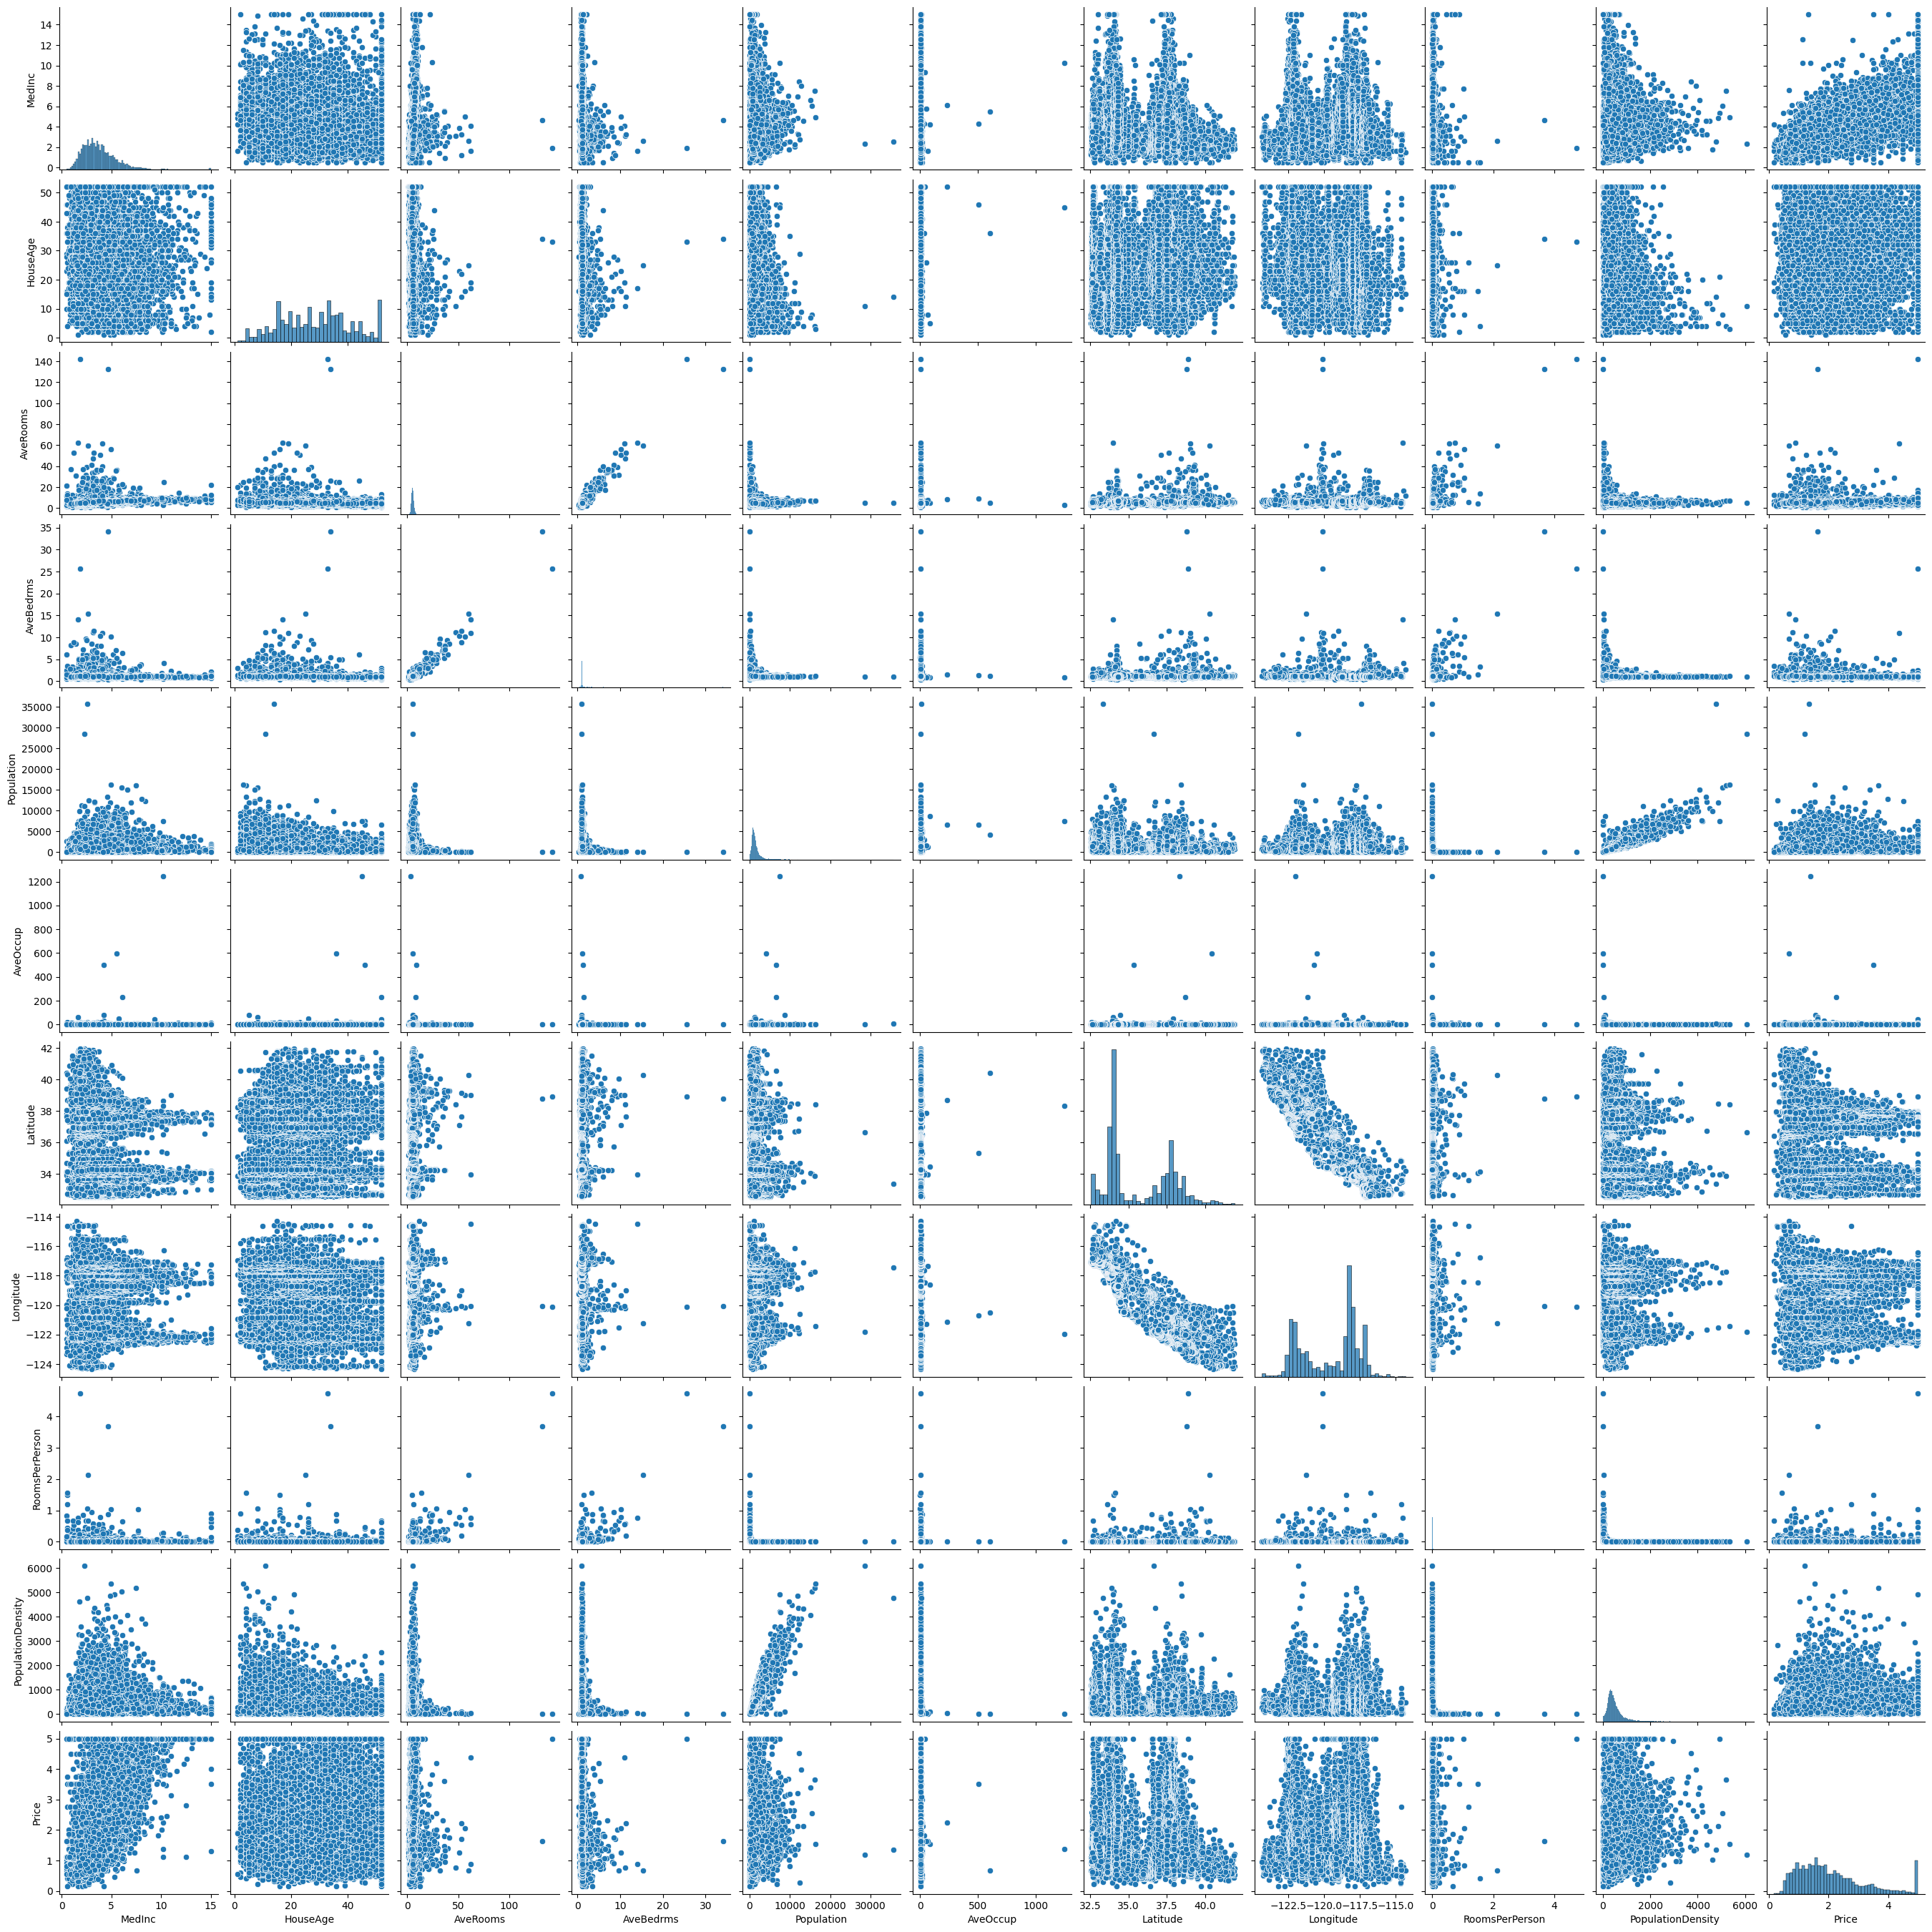

In [8]:
#create a scatterplot pairplot matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.show()



In [9]:
df['Price'].describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: Price, dtype: float64

In [10]:
#Remove outliers
df = df[df['Price'] < 5]

#Display the first five rows of the DataFrame
df.head(5)


MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  RoomsPerPerson  PopulationDensity  Price  
0    -122.23        0.021690              126.0  4.526  
1    -122.22        0.002598             1138.0  3.585  
2    -122.24        0.016710              177.0  3.521  
3    -122.25        0.010425              219.0  3.413  
4    -122.25        0.011118              259.0  3.422

In [12]:
import statsmodels.api as sm

# Define the predictor variables (features) and the response variable
X = df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
        'Latitude', 'Longitude', 'RoomsPerPerson', 'PopulationDensity']]
y = df['Price']

# Add a constant to include an intercept in the model
X = sm.add_constant(X)

# Fit the multiple linear regression model
mlr_model = sm.OLS(y, X).fit()

# Print summary to get coefficient estimates and statistical significance
print(mlr_model.summary())




                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     3016.
Date:                Sat, 11 Jan 2025   Prob (F-statistic):               0.00
Time:                        08:06:23   Log-Likelihood:                -18161.
No. Observations:               19648   AIC:                         3.634e+04
Df Residuals:                   19637   BIC:                         3.643e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -32.8339      0.57

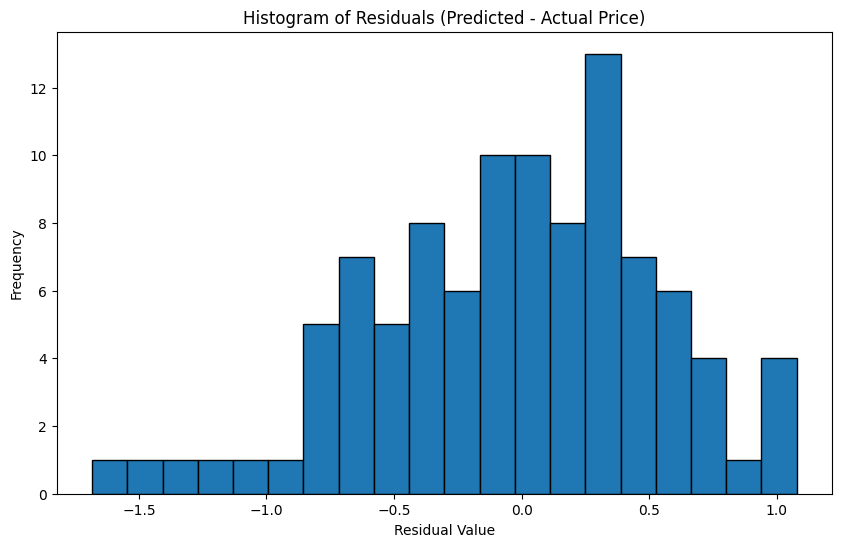

In [13]:
# Randomly select 100 rows
random_sample = df.sample(n=100, random_state=42)

# Get X and y for the random sample
X_sample = random_sample[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
                         'Latitude', 'Longitude', 'RoomsPerPerson', 'PopulationDensity']]
X_sample = sm.add_constant(X_sample)
y_sample = random_sample['Price']

# Get predictions
predictions = mlr_model.predict(X_sample)

# Calculate residuals (predicted - actual)
residuals = predictions - y_sample

# Create histogram of residuals
plt.figure(figsize=(10,6))
plt.hist(residuals, bins=20, edgecolor='black')
plt.title('Histogram of Residuals (Predicted - Actual Price)')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.show()


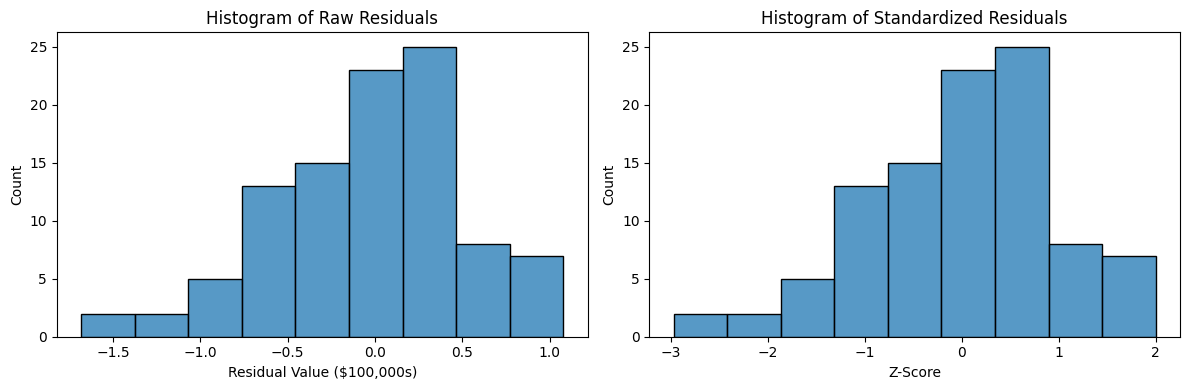

In [14]:
# If we wanted Z-scores instead:
from scipy import stats
z_scores = stats.zscore(residuals)  # Standardized to mean=0, std=1

# Create a 1x2 plot to compare
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Raw Residuals
sns.histplot(residuals, ax=ax1)
ax1.set_xlabel("Residual Value ($100,000s)")
ax1.set_title("Histogram of Raw Residuals")

# Z-scores
sns.histplot(z_scores, ax=ax2)
ax2.set_xlabel("Z-Score")
ax2.set_title("Histogram of Standardized Residuals")

plt.tight_layout()
plt.show()

Perform Feature Engineering to improve model performance


In [24]:
# Create meaningful interactions and transformations
df['Income_per_Room'] = df['MedInc'] / df['AveRooms']
df['BedroomRatio'] = df['AveBedrms'] / df['AveRooms']
df['OccupancyRate'] = df['Population'] / (df['AveRooms'] * df['AveOccup'])

# Log transformations for skewed features
df['Log_Population'] = np.log1p(df['Population'])
df['Log_MedInc'] = np.log1p(df['MedInc'])

In [27]:
df.head(5)

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  RoomsPerPerson  PopulationDensity  Price  Income_per_Room  \
0    -122.23        0.021690              126.0  4.526         1.192017   
1    -122.22        0.002598             1138.0  3.585         1.330750   
2    -122.24        0.016710              177.0  3.521         0.875637   
3    -122.25        0.010425              219.0  3.413         0.970046   
4    -122.25        0.011118              259.0  3.422         0.612272   

   BedroomRatio  OccupancyRate  Log_Population  Log_MedInc  
0      0.146591      18.040909        5.777652    2.232720  
1      0.155797     182.426257        7.784057    2.230165  
2      0.129516      21.355828        6.208590    2.111110  
3      0.184458      37.645997        6.326149    1.893579  
4      0.172096      41.229871        6.338594    1.578195

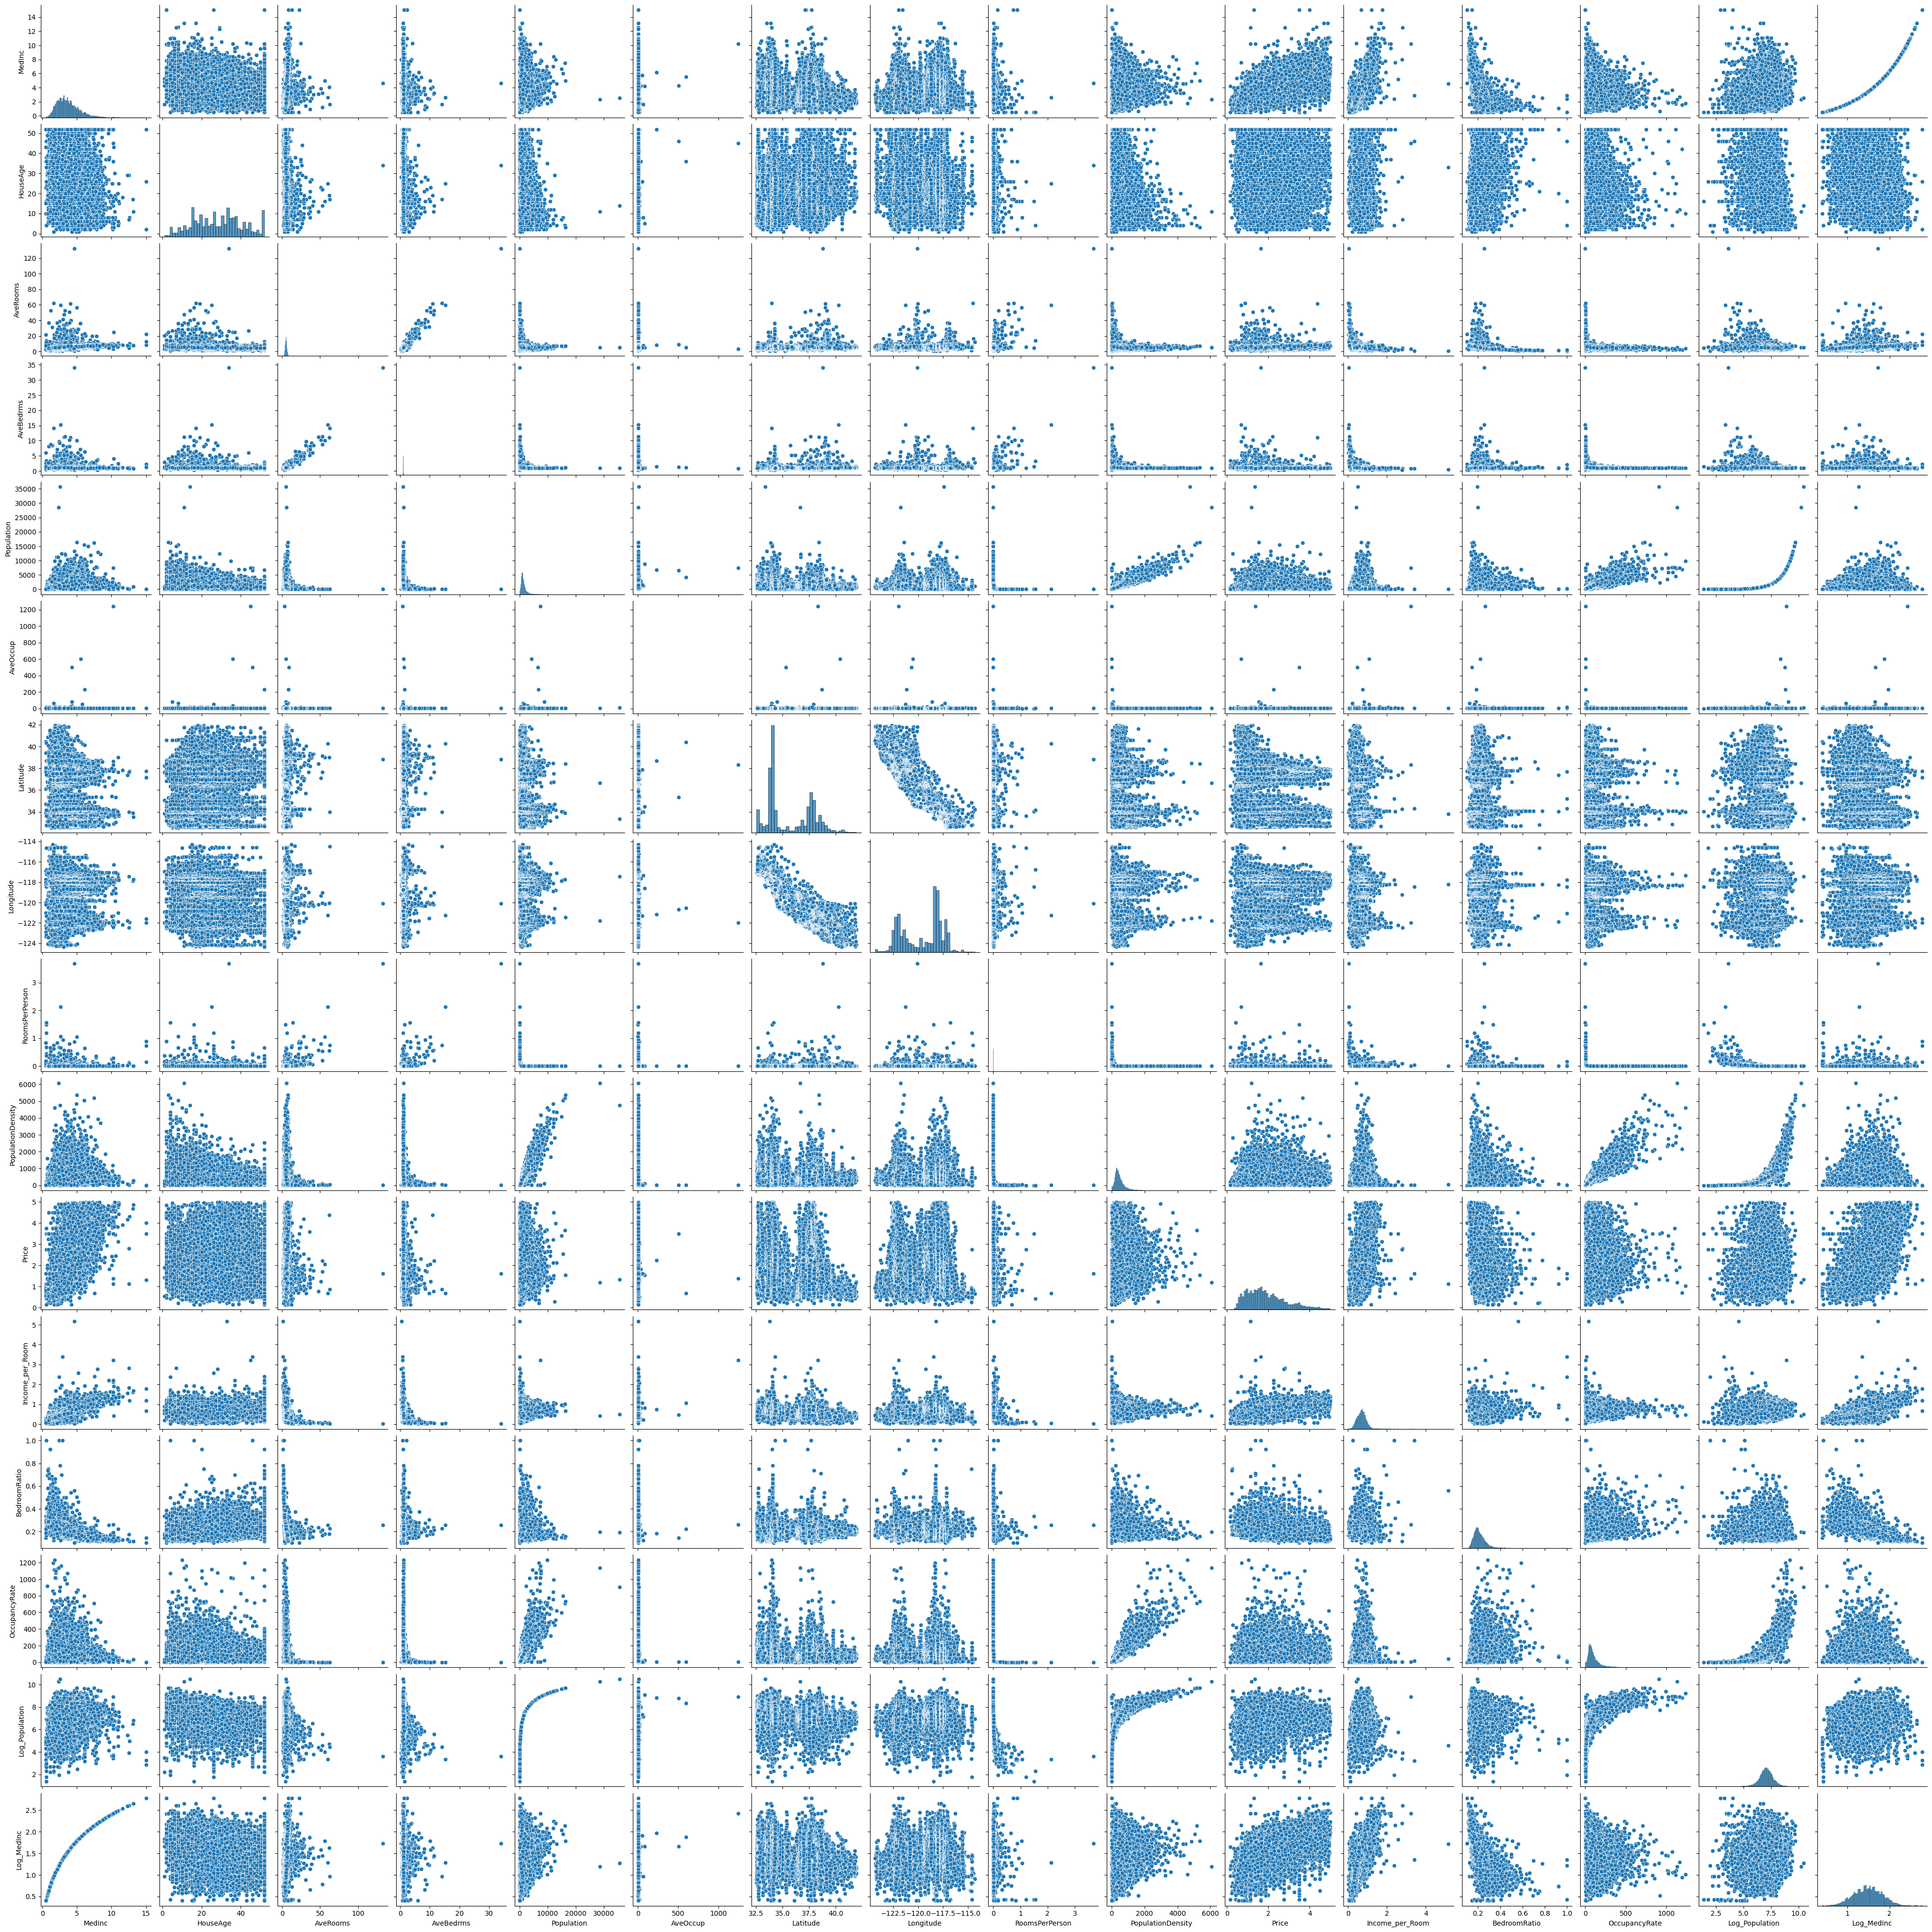

In [28]:
#create a sns pairplot matrix
sns.pairplot(df)
plt.show()


In [29]:
# Calculate distance to LA (coordinates: 34.0522° N, 118.2437° W)
LA_coords = (34.0522, -118.2437)
df['DistanceToLA'] = np.sqrt(
    (df['Latitude'] - LA_coords[0])**2 + 
    (df['Longitude'] - LA_coords[1])**2
)


In [33]:
# Add polynomial terms for key features
from sklearn.preprocessing import PolynomialFeatures

key_features = ['MedInc', 'HouseAge', 'AveRooms']
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df[key_features])

#include polynomial features in an updated df 
df = pd.concat([df, pd.DataFrame(poly_features, columns=poly.get_feature_names_out(key_features))], axis=1)

#perform feature selection
df.head(5)

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  RoomsPerPerson  PopulationDensity  ...  DistanceToLA  MedInc  \
0    -122.23        0.021690              126.0  ...      5.526540  8.3252   
1    -122.22        0.002598             1138.0  ...      5.505479  8.3014   
2    -122.24        0.016710              177.0  ...      5.513048  7.2574   
3    -122.25        0.010425              219.0  ...      5.520301  5.6431   
4    -122.25        0.011118              259.0  ...      5.520301  3.8462   

   HouseAge  AveRooms   MedInc^2  MedInc HouseAge  MedInc AveRooms  \
0      41.0  6.984127  69.308955         341.3332        58.144254   
1      21.0  6.238137  68.913242         174.3294        51.785271   
2      52.0  8.288136  52.669855         377.3848        60.150315   
3      52.0  5.817352  31.844578         293.4412        32.827897   
4      52.0  6.281853  14.793254         200.0024        24.161264   

   HouseAge^2  HouseAge AveRooms  AveRooms^2  
0      1681.0         286.349206   48.778030  
1       441.0         131.000879   38.914354  
2      2704.0         430.983051   68.693192  
3      2704.0         302.502283   33.841580  
4      2704.0         326.656371   39.461681  

[5 rows x 26 columns]

In [36]:
#drop columns with na values
df = df.dropna()

#print number of na values for each column
print(df.isna().sum())


MedInc               0
HouseAge             0
AveRooms             0
AveBedrms            0
Population           0
AveOccup             0
Latitude             0
Longitude            0
RoomsPerPerson       0
PopulationDensity    0
Price                0
Income_per_Room      0
BedroomRatio         0
OccupancyRate        0
Log_Population       0
Log_MedInc           0
DistanceToLA         0
MedInc               0
HouseAge             0
AveRooms             0
MedInc^2             0
MedInc HouseAge      0
MedInc AveRooms      0
HouseAge^2           0
HouseAge AveRooms    0
AveRooms^2           0
dtype: int64


In [41]:
from sklearn.linear_model import ElasticNet
# Perform Elastic Net feature selection on df
X = df.drop(columns=['Price'])
y = df['Price']

# Create and fit the Elastic Net model
model = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)
model.fit(X, y)

# Extract coefficient values
coefs = pd.Series(model.coef_, index=X.columns)
selected_features = coefs[coefs.abs() > 1e-5].index

# Print the selected features (non-zero coefficients)
print("Selected Features (non-zero coefficients):", list(selected_features))

# (Optional) Keep only selected features and Price
df = df[['Price'] + list(selected_features)]


Selected Features (non-zero coefficients): ['MedInc', 'HouseAge', 'Population', 'PopulationDensity', 'OccupancyRate', 'MedInc HouseAge', 'HouseAge^2', 'HouseAge AveRooms', 'AveRooms^2']


In [42]:
X = df.drop(columns=['Price'])
y = df['Price']

final_model = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)
final_model.fit(X, y)

print("Final model score (R^2):", final_model.score(X, y))


Final model score (R^2): 0.3410324405584212
